<img src="https://i.imgur.com/Ist45yG.png" style="width:700px;">

# **Instalar librerías**

In [1]:
!pip install python-igraph
!pip install cairocffi

# **Importar librerías**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils_notebook.py','wb').write(src)

Saving utils_notebook.py to utils_notebook (1).py


In [0]:
import numpy as np
from utils_notebook import *
%matplotlib inline
import pandas as pd
from sklearn.datasets import *
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## Leer el *path* al dataset

Leemos el dataset como un Pandas Dataframe para analizar los datos.

In [6]:
path = '/content/gdrive/My Drive/Networks/dataset/com-youtube.ungraph.txt'
data = pd.read_csv(path, sep='\t', skiprows=3)
print("Hay", data.to_numpy().shape[0], "conexiones en el dataset de youtube")
data.head()

('Hay', 2987624, 'conexiones en el dataset de youtube')


# FromNodeId  ToNodeId
0             1         2
1             1         3
2             1         4
3             1         5
4             1         6

In [7]:
data.describe()

# FromNodeId      ToNodeId
count  2.987624e+06  2.987624e+06
mean   1.875488e+05  4.128765e+05
std    2.608200e+05  3.392837e+05
min    1.000000e+00  2.000000e+00
25%    1.181500e+04  1.093080e+05
50%    7.680000e+04  3.070595e+05
75%    2.342970e+05  6.864020e+05
max    1.157804e+06  1.157827e+06

Observamos que el dataset consta de dos columnas que nos indica las conexiones entre nodos. Además nos damos cuenta que hay 2987624 conexiones. Es preciso aclarar que debido a la cantidad de datos para entrenar los algoritmos, estos pueden presentar demoras.

Pandas dataframe tiene una función muy útil, esta muestra algunas estadisticas 

# Tratamiento de datos

Convertimos el dataframe a un Ndarray de numpy para pasar estos datos a los algoritmos.

In [0]:
np_data = data.to_numpy()

## DBSCAN

Es un algoritmo orientado a la densidad, en donde los clusters son conjuntos de puntos con alta densidad. Un punto pertenece a un cluster si este esta cerca a puntos vecinos agrupados (del montón). El algoritmo DBSCAN puede encontrar clusters con una tamaño y forma arbitraria, además encontrar puntos por fuera y clasificarlos como ruido

<img src="https://dashee87.github.io/images/mean_shift_search.gif" style="width:300px;">

Aplicamos una transformación a los datos con el fin de buscar relaciones entre ellos

# Entrenar el modelo y visualizar datos

In [10]:
dbscan_data = StandardScaler().fit_transform(np_data) #mean zero and variance one
dbscan_data = dbscan_data[:1000]

DBS = DBSCAN(eps=.001)
train_model(DBS, dbscan_data)

('Number of labels:', 7)


Number of labels: 7
...


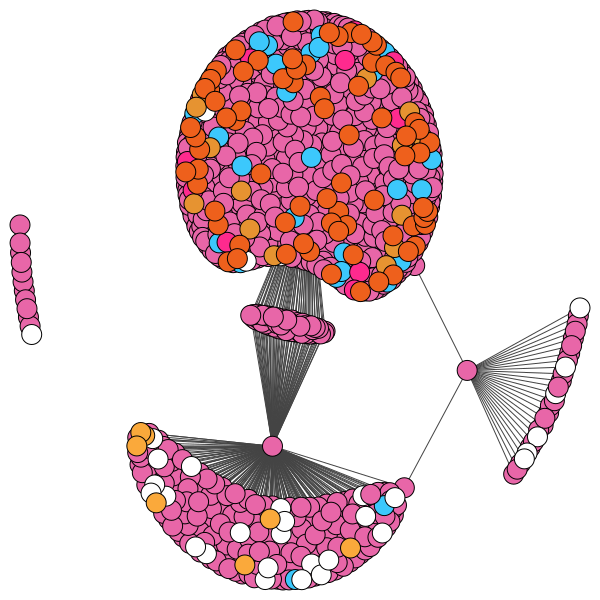

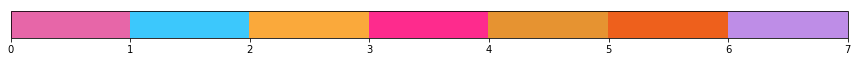

In [12]:
n_labels = len(np.unique(DBS.labels_))
colors_dbscan = rand_cmap(n_labels, first_color_black=False)
cdict = get_color_dict(colors_dbscan)
print('...')
plot_graph(DBS.labels_, dbscan_data, cdict, 'kmeans')

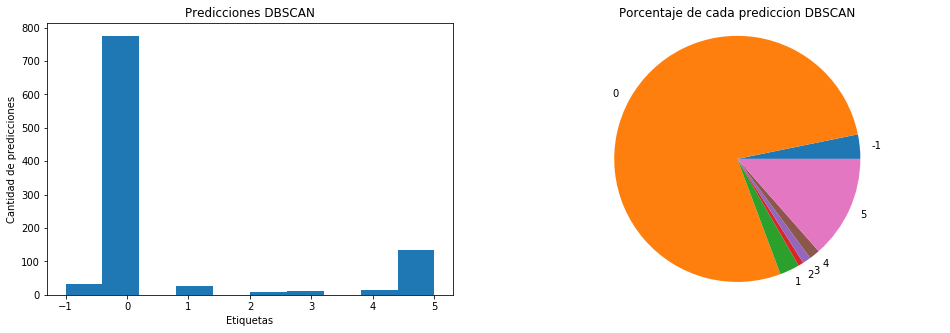

In [13]:
sizes = [100.0*np.count_nonzero(DBS.labels_ == x)/len(DBS.labels_) for x in np.unique(DBS.labels_)]

fig, ax = plt.subplots(ncols=2, figsize=(16,5))

n, bins, patches = ax[0].hist(DBS.labels_)
ax[0].set_xlabel('Etiquetas');
ax[0].set_ylabel('Cantidad de predicciones');
ax[0].set_title('Predicciones DBSCAN');

ax[1].pie(sizes, labels=np.unique(DBS.labels_));
ax[1].set_title('Porcentaje de cada prediccion DBSCAN');
ax[1].axis('equal');

In [14]:
for label, perc in zip(np.unique(DBS.labels_), sizes):
    print("El porcentaje para la etiqueta", label, "es del", perc)

('El porcentaje para la etiqueta', -1, 'es del', 3.2)
('El porcentaje para la etiqueta', 0, 'es del', 77.5)
('El porcentaje para la etiqueta', 1, 'es del', 2.6)
('El porcentaje para la etiqueta', 2, 'es del', 0.7)
('El porcentaje para la etiqueta', 3, 'es del', 1.1)
('El porcentaje para la etiqueta', 4, 'es del', 1.4)
('El porcentaje para la etiqueta', 5, 'es del', 13.5)
